In [1]:
import numpy as np
!pip install langdetect
!pip install tweepy  networkx matplotlib seaborn

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from textblob import TextBlob
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tisse\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tisse\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
import networkx as nx

# Datei einlesen
df = pd.read_csv('Ukraine_war.csv', nrows=40000 )
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,snscrape.modules.twitter.Tweet,https://twitter.com/ksenijapavlovic/status/150...,2022-03-05 23:59:58+00:00,There was an anti war protest for #Ukraine as ...,There was an anti war protest for #Ukraine as ...,1500259859937337349,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,4,25,...,NaN,"{'_type': 'snscrape.modules.twitter.Tweet', 'u...",NaN,NaN,NaN,NaN,NaN,['Ukraine'],NaN,Ukraine war
1,snscrape.modules.twitter.Tweet,https://twitter.com/ty_phoon31/status/15002598...,2022-03-05 23:59:58+00:00,https://t.co/Z1pURKlNHu NATO followed USA into...,abc.net.au/news/2022-03-0… NATO followed USA i...,1500259857160568834,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war
2,snscrape.modules.twitter.Tweet,https://twitter.com/ann_peace22/status/1500259...,2022-03-05 23:59:54+00:00,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,1500259841520111616,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.500182e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['IStandWithUkraine'],NaN,Ukraine war
3,snscrape.modules.twitter.Tweet,https://twitter.com/GardensR4Health/status/150...,2022-03-05 23:59:52+00:00,@nytimes This war could have been avoided by e...,@nytimes This war could have been avoided by e...,1500259833915883525,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.499516e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
4,snscrape.modules.twitter.Tweet,https://twitter.com/kbrunolieber/status/150025...,2022-03-05 23:59:52+00:00,@ggreenwald Remember the biggest mistake made ...,@ggreenwald Remember the biggest mistake made ...,1500259832649203713,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,1.500200e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,snscrape.modules.twitter.Tweet,https://twitter.com/Iyosayi_Je_Tv/status/14977...,2022-02-26 23:10:59+00:00,Ukraine War: Understanding Russian President V...,Ukraine War: Understanding Russian President V...,1497710816526807044,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war
39996,snscrape.modules.twitter.Tweet,https://twitter.com/habib_baba/status/14977108...,2022-02-26 23:10:58+00:00,Q&amp;A’s on: was Russia right to be threatene...,Q&amp;A’s on: was Russia right to be threatene...,1497710811069960196,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.497711e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",NaN,NaN,NaN,NaN,NaN,Ukraine war
39997,snscrape.modules.twitter.Tweet,https://twitter.com/GrimDawn4/status/149771081...,2022-02-26 23:10:58+00:00,@NikkiHaley Democrats now want to finance Hunt...,@NikkiHaley Democrats now want to finance Hunt...,1497710810768244736,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,1.497602e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Ukraine war
39998,snscrape.modules.twitter.Tweet,https://twitter.com/habib_baba/status/14977108...,2022-02-26 23:10:56+00:00,1/4 As we are gutted and praying for the Peopl...,1/4 As we are gutted and praying for the Peopl...,1497710804266795014,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ukraine war


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _type             40000 non-null  object 
 1   url               40000 non-null  object 
 2   date              40000 non-null  object 
 3   content           40000 non-null  object 
 4   renderedContent   40000 non-null  object 
 5   id                40000 non-null  int64  
 6   user              40000 non-null  object 
 7   replyCount        40000 non-null  int64  
 8   retweetCount      40000 non-null  int64  
 9   likeCount         40000 non-null  int64  
 10  quoteCount        40000 non-null  int64  
 11  conversationId    40000 non-null  int64  
 12  lang              40000 non-null  object 
 13  source            40000 non-null  object 
 14  sourceUrl         40000 non-null  object 
 15  sourceLabel       40000 non-null  object 
 16  outlinks          14559 non-null  object

In [ ]:
import re
# Konvertiere alle Einträge in der Spalte 'text' zu Strings
df['content'] = df['content'].astype(str)
def extract_mentions(text):
    # Extrahiert alle @-Erwähnungen aus einem Text
    mentions = re.findall(r'@\w+', text)
    return mentions

# Füge eine neue Spalte 'mentions' hinzu
df['mentions'] = df['content'].apply(extract_mentions)

# Vorschau der neuen Spalte
print(df[['content', 'mentions']])

                                                 content  \
0      There was an anti war protest for #Ukraine as ...   
1      https://t.co/Z1pURKlNHu NATO followed USA into...   
2      @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...   
3      @nytimes This war could have been avoided by e...   
4      @ggreenwald Remember the biggest mistake made ...   
...                                                  ...   
39995  Ukraine War: Understanding Russian President V...   
39996  Q&amp;A’s on: was Russia right to be threatene...   
39997  @NikkiHaley Democrats now want to finance Hunt...   
39998  1/4 As we are gutted and praying for the Peopl...   
39999  Heartbreaking. Making Molotov cocktails, linin...   

                                                mentions  
0                                                     []  
1                                                     []  
2      [@mfa_russia, @RusEmbUSA, @RussiaUN, @MFA_Ukra...  
3                                          

In [ ]:
def create_edges(df):
    edges = []
    for index, row in df.iterrows():
        user = row['user']
        mentions = row['mentions']
        for mention in mentions:
            edges.append((user, mention[1:]))  # Entferne das '@' Zeichen
    return edges

edges = create_edges(df)

# Vorschau der Kanten
print(edges[:10])

[("{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00', 'followersCount': 300, 'friendsCount': 1571, 'statusesCount': 55, 'favouritesCount': 93, 'listedCount': 0, 'mediaCount': 4, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1499382882132971523/x812X51j_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/768418101641748480/1646315722', 'label': None, 'url': 'https://twitter.com/ann_peace22'}", 'mfa_russia'), ("{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-131-1598c3dcb12a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zelenskyy['sentiment'] = df_zelenskyy['content'].apply(lambda text: sia.polarity_scores(text))
<ipython-input-131-1598c3dcb12a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kremlin['sentiment'] = df_kremlin['content'].apply(lambda text: sia.polarity_scores(text))
<ipython-input-131-1598c3dcb12a>:21: SettingWithCopyWarning: 
A value is trying to be 

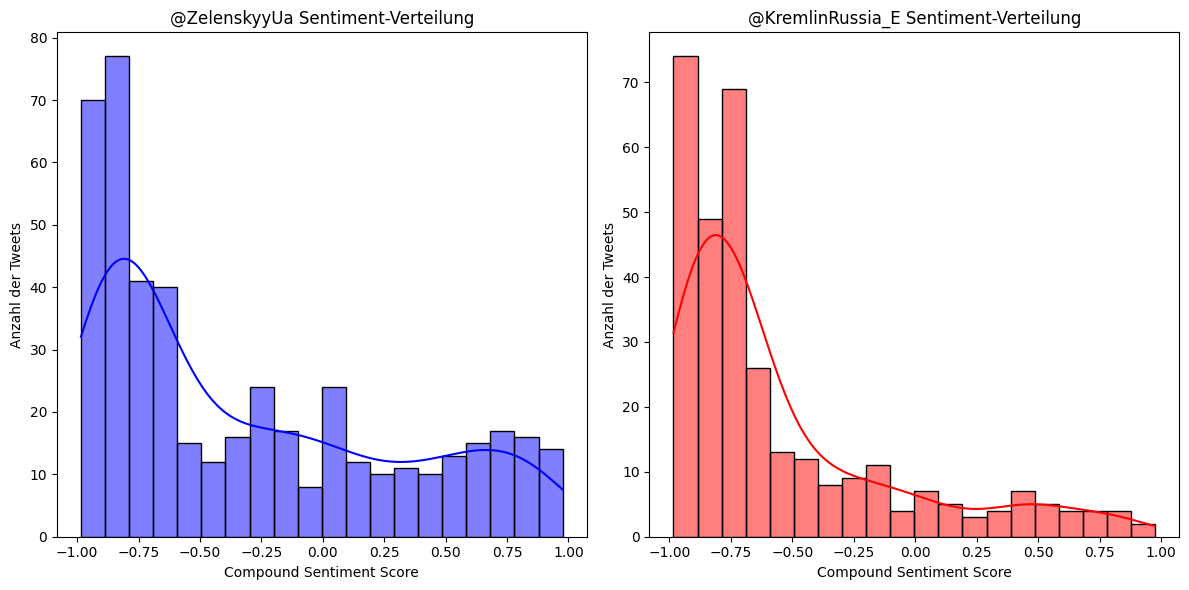

@ZelenskyyUa:
Durchschnittliches Sentiment: -0.3165435064935065
Standardabweichung des Sentiments: 0.5983328907805813
Positive Tweets: 126
Negative Tweets: 320
Neutrale Tweets: 16

@KremlinRussia_E:
Durchschnittliches Sentiment: -0.5530865625000001
Standardabweichung des Sentiments: 0.4657753011895091
Positive Tweets: 41
Negative Tweets: 275
Neutrale Tweets: 4


In [ ]:
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

# Sicherstellen, dass das vader_lexicon heruntergeladen ist
nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer initialisieren
sia = SentimentIntensityAnalyzer()

# Filterung der Tweets, die @ZelenskyyUa und @KremlinRussia_E erwähnen
df_zelenskyy = df[df['mentions'].apply(lambda mentions: '@ZelenskyyUa' in mentions)]
df_kremlin = df[df['mentions'].apply(lambda mentions: '@KremlinRussia_E' in mentions)]

# Durchführung der Sentimentanalyse auf die gefilterten Tweets
df_zelenskyy['sentiment'] = df_zelenskyy['content'].apply(lambda text: sia.polarity_scores(text))
df_kremlin['sentiment'] = df_kremlin['content'].apply(lambda text: sia.polarity_scores(text))

# Extrahiere den compound-Wert für eine einfachere Analyse
df_zelenskyy['compound'] = df_zelenskyy['sentiment'].apply(lambda score_dict: score_dict['compound'])
df_kremlin['compound'] = df_kremlin['sentiment'].apply(lambda score_dict: score_dict['compound'])

# Verteilung der Sentiments visualisieren
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# ZelenskyyUa Sentiment Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_zelenskyy['compound'], bins=20, kde=True, color='blue')
plt.title('@ZelenskyyUa Sentiment-Verteilung')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Anzahl der Tweets')

# KremlinRussia_E Sentiment Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_kremlin['compound'], bins=20, kde=True, color='red')
plt.title('@KremlinRussia_E Sentiment-Verteilung')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Anzahl der Tweets')

plt.tight_layout()
plt.show()


# Durchschnittliches Sentiment berechnen
avg_sentiment_zelenskyy = df_zelenskyy['compound'].mean()
avg_sentiment_kremlin = df_kremlin['compound'].mean()

# Standardabweichung des Sentiments berechnen
std_sentiment_zelenskyy = df_zelenskyy['compound'].std()
std_sentiment_kremlin = df_kremlin['compound'].std()

# Anzahl der positiven, negativen und neutralen Tweets
positive_tweets_zelenskyy = df_zelenskyy[df_zelenskyy['compound'] > 0].shape[0]
negative_tweets_zelenskyy = df_zelenskyy[df_zelenskyy['compound'] < 0].shape[0]
neutral_tweets_zelenskyy = df_zelenskyy[df_zelenskyy['compound'] == 0].shape[0]

positive_tweets_kremlin = df_kremlin[df_kremlin['compound'] > 0].shape[0]
negative_tweets_kremlin = df_kremlin[df_kremlin['compound'] < 0].shape[0]
neutral_tweets_kremlin = df_kremlin[df_kremlin['compound'] == 0].shape[0]

# Ergebnisse ausgeben
print(f"@ZelenskyyUa:")
print(f"Durchschnittliches Sentiment: {avg_sentiment_zelenskyy}")
print(f"Standardabweichung des Sentiments: {std_sentiment_zelenskyy}")
print(f"Positive Tweets: {positive_tweets_zelenskyy}")
print(f"Negative Tweets: {negative_tweets_zelenskyy}")
print(f"Neutrale Tweets: {neutral_tweets_zelenskyy}\n")

print(f"@KremlinRussia_E:")
print(f"Durchschnittliches Sentiment: {avg_sentiment_kremlin}")
print(f"Standardabweichung des Sentiments: {std_sentiment_kremlin}")
print(f"Positive Tweets: {positive_tweets_kremlin}")
print(f"Negative Tweets: {negative_tweets_kremlin}")
print(f"Neutrale Tweets: {neutral_tweets_kremlin}")

In [ ]:
#1
#import networkx as nx

# Erstelle ein gerichtetes Netzwerk
G = nx.DiGraph()

# Füge die Kanten zum Netzwerk hinzu
G.add_edges_from(edges)

# Berechne Netzwerkmetriken
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Beispielhafte Ausgabe der Top 10 Knoten mit höchster Degree Centrality
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:20]
top_10_betweenness = sorted(betweenness_centrality.items(), key = lambda x: x[1], reverse=True)[:20]
top_10_closeness=sorted(closeness_centrality.items(), key= lambda x:[1], reverse=True ) [:20]
print("Top 10 Knoten mit höchster Degree Centrality:")
for node, centrality in top_10_degree:
    print(f"{node}: {centrality}")

print("Top 10 Knoten mit Betweeness Centrality: ")
for node, betweenness in top_10_betweenness:
  print(f"{node}: {centrality}")

Top 10 Knoten mit höchster Degree Centrality:
ZelenskyyUa: 0.01169811320754717
YouTube: 0.011590296495956873
POTUS: 0.01123989218328841
Ukraine: 0.01105121293800539
KremlinRussia_E: 0.006954177897574124
NATO: 0.006954177897574124
KyivIndependent: 0.00646900269541779
mfa_russia: 0.004824797843665768
Reuters: 0.004177897574123989
BorisJohnson: 0.00398921832884097
MFA_Ukraine: 0.003962264150943396
FoxNews: 0.003315363881401617
CNN: 0.003126684636118598
RF_OSCE: 0.002991913746630728
nytimes: 0.002991913746630728
JoeBiden: 0.0029649595687331535
RusEmbUSA: 0.002884097035040431
elonmusk: 0.002884097035040431
nexta_tv: 0.0027762803234501346
RussiaUN: 0.0027493261455525607
Top 10 Knoten mit Betweeness Centrality: 
{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00

In [ ]:
#1
import networkx as nx
# Erstelle ein gerichtetes Netzwerk
G = nx.DiGraph()

# Füge die Kanten zum Netzwerk hinzu
G.add_edges_from(edges)

# Berechne Netzwerkmetriken
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Beispielhafte Ausgabe der Top 10 Knoten mit höchster Degree Centrality
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Knoten mit höchster Degree Centrality:")
for node, centrality in top_10_degree:
    print(f"{node}: {centrality}")

print("\nTop 10 Knoten mit Betweenness Centrality:")
for node, betweenness in top_10_betweenness:
    print(f"{node}: {betweenness}")

print("\nTop 10 Knoten mit Closeness Centrality:")
for node, closeness in top_10_closeness:
    print(f"{node}: {closeness}")


Top 10 Knoten mit höchster Degree Centrality:
ZelenskyyUa: 0.01169811320754717
YouTube: 0.011590296495956873
POTUS: 0.01123989218328841
Ukraine: 0.01105121293800539
KremlinRussia_E: 0.006954177897574124
NATO: 0.006954177897574124
KyivIndependent: 0.00646900269541779
mfa_russia: 0.004824797843665768
Reuters: 0.004177897574123989
BorisJohnson: 0.00398921832884097

Top 10 Knoten mit Betweenness Centrality:
{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00', 'followersCount': 300, 'friendsCount': 1571, 'statusesCount': 55, 'favouritesCount': 93, 'listedCount': 0, 'mediaCount': 4, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1499382882132971523/x812X51j_normal.jpg', 'profileB

In [ ]:
import networkx as nx

# Erstelle ein gerichtetes Netzwerk
G = nx.DiGraph()

# Füge die Kanten zum Netzwerk hinzu
G.add_edges_from(edges)

# Konsistenz der Kanten überprüfen
print(f"Anzahl der Kanten im Netzwerk: {G.number_of_edges()}")
print(f"Anzahl der Knoten im Netzwerk: {G.number_of_nodes()}")

# Überprüfe die Anzahl der verbundenen Komponenten
num_weakly_connected_components = nx.number_weakly_connected_components(G)
print(f"Anzahl der schwach verbundenen Komponenten: {num_weakly_connected_components}")


# Berechne Netzwerkmetriken
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Beispielhafte Ausgabe der Top 10 Knoten mit höchster Degree Centrality
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Knoten mit höchster Degree Centrality:")
for node, centrality in top_10_degree:
    print(f"{node}: {centrality}")

print("\nTop 10 Knoten mit höchster Betweenness Centrality:")
for node, betweenness in top_10_betweenness:
    print(f"{node}: {betweenness}")

print("\nTop 10 Knoten mit höchster Closeness Centrality:")
for node, closeness in top_10_closeness:
    print(f"{node}: {closeness}")

print("\nTop 10 Knoten mit höchster Eigenvektor-Zentralität:")
for node, eigenvector in top_10_eigenvector:
    print(f"{node}: {eigenvector}")

Anzahl der Kanten im Netzwerk: 36630
Anzahl der Knoten im Netzwerk: 37101
Anzahl der schwach verbundenen Komponenten: 5614
Top 10 Knoten mit höchster Degree Centrality:
ZelenskyyUa: 0.01169811320754717
YouTube: 0.011590296495956873
POTUS: 0.01123989218328841
Ukraine: 0.01105121293800539
KremlinRussia_E: 0.006954177897574124
NATO: 0.006954177897574124
KyivIndependent: 0.00646900269541779
mfa_russia: 0.004824797843665768
Reuters: 0.004177897574123989
BorisJohnson: 0.00398921832884097

Top 10 Knoten mit höchster Betweenness Centrality:
{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00', 'followersCount': 300, 'friendsCount': 1571, 'statusesCount': 55, 'favouritesCount': 93, 'listedCount': 0, 'mediaCount': 4, 'location': '', 'protected': False, 'linkUrl': No

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Erstelle ein gerichtetes Netzwerk
G = nx.DiGraph()

# Füge die Kanten zum Netzwerk hinzu
G.add_edges_from(edges)

# Visualisiere das Netzwerk
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title("Netzwerk-Visualisierung")
plt.show()

# Überprüfe die Anzahl der verbundenen Komponenten
connected_components = nx.number_weakly_connected_components(G)
print(f"Anzahl der verbundenen Komponenten: {connected_components}")

# Berechne Netzwerkmetriken
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
closeness_centrality = nx.closeness_centrality(G)

# Beispielhafte Ausgabe der Top 10 Knoten mit höchster Degree Centrality
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Knoten mit höchster Degree Centrality:")
for node, centrality in top_10_degree:
    print(f"{node}: {centrality}")

print("\nTop 10 Knoten mit Betweenness Centrality:")
for node, betweenness in top_10_betweenness:
    print(f"{node}: {betweenness}")

print("\nTop 10 Knoten mit Closeness Centrality:")
for node, closeness in top_10_closeness:
    print(f"{node}: {closeness}")


ValueError: 
!', 'rawDescription': 'Politik & Satir är ler & långhalm. Eko-Odlar på koloni, snickrar, bloggar, skriver, rimmar illa.\n#BDS #FreeAssange #Peace\n#noNATO Monopoly\nNo DM begging for 
                                                                                                                       ^
ParseFatalException: Expected token, found '\'  (at char 119), (line:1, col:120)

<Figure size 1000x800 with 1 Axes>

Anzahl der verbundenen Komponenten: 5614

Top 10 Knoten mit höchster Degree Centrality:
ZelenskyyUa: 0.01169811320754717
YouTube: 0.011590296495956873
POTUS: 0.01123989218328841
Ukraine: 0.01105121293800539
KremlinRussia_E: 0.006954177897574124
NATO: 0.006954177897574124
KyivIndependent: 0.00646900269541779
mfa_russia: 0.004824797843665768
Reuters: 0.004177897574123989
BorisJohnson: 0.00398921832884097

Top 10 Knoten mit Betweenness Centrality:
{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00', 'followersCount': 300, 'friendsCount': 1571, 'statusesCount': 55, 'favouritesCount': 93, 'listedCount': 0, 'mediaCount': 4, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/149938288

Komponente 1: {'POTUS', 'NATO', 'Ukraine', 'MFA_Ukraine', 'KyivIndependent', 'Reuters', 'BorisJohnson', 'ZelenskyyUa'}
Komponente 2: {'KremlinRussia_E', 'Russia', 'mfa_russia'}
Komponente 3: {'USA', 'RusEmbUSA'}


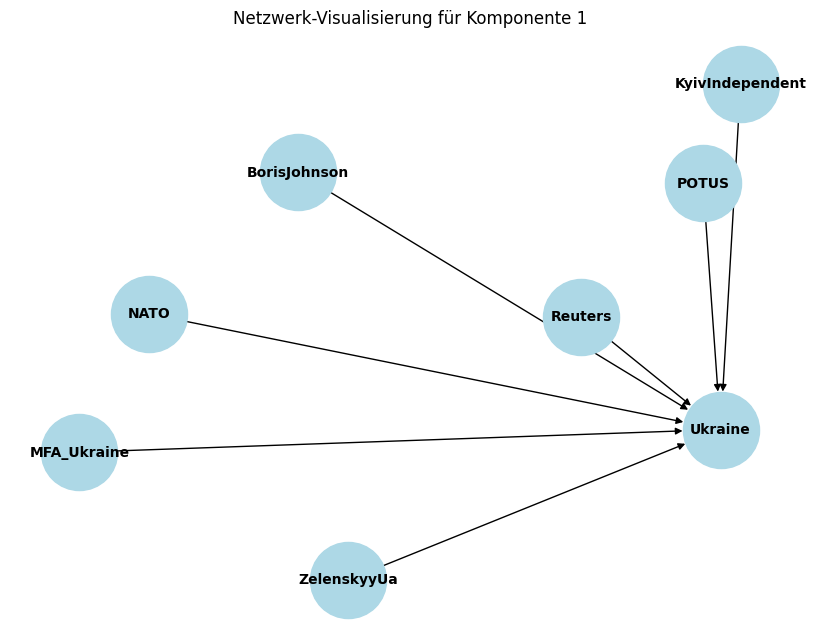

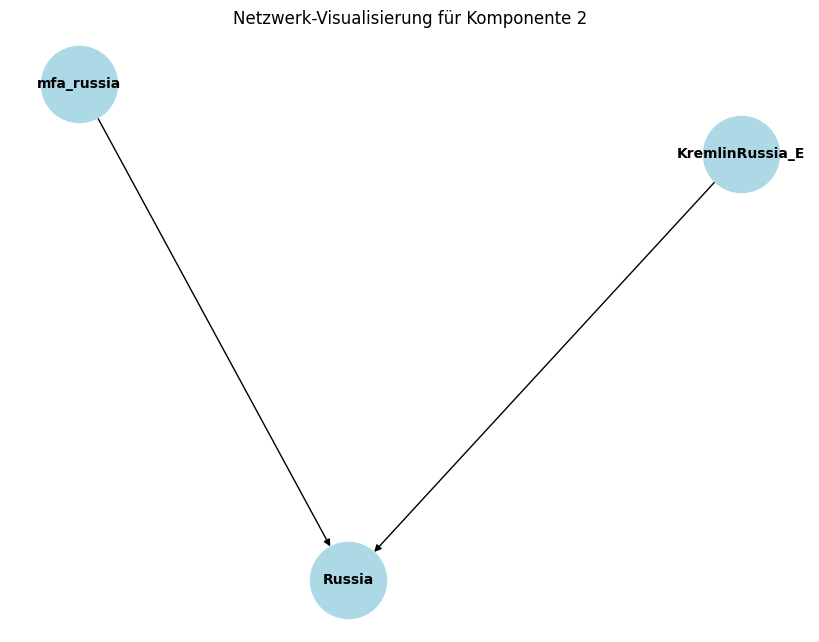

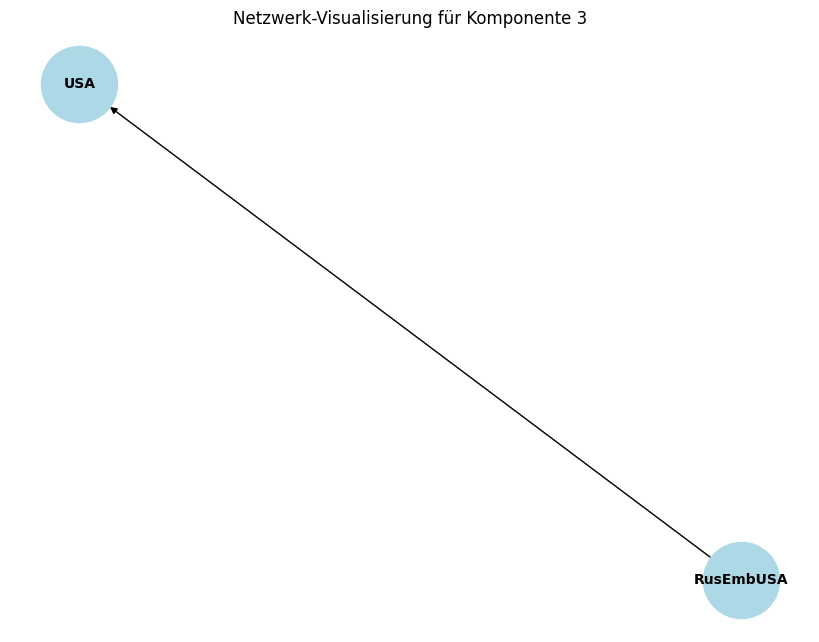

In [ ]:
# Anzeigen der verbundenen Komponenten
components = list(nx.weakly_connected_components(G))
for i, component in enumerate(components):
    print(f"Komponente {i + 1}: {component}")

# Visualisiere jede Komponente separat
for i, component in enumerate(components):
    subgraph = G.subgraph(component)
    plt.figure(figsize=(8, 6))
    nx.draw(subgraph, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    plt.title(f"Netzwerk-Visualisierung für Komponente {i + 1}")
    plt.show()


In [ ]:
import pandas as pd
import re
import networkx as nx

# Beispiel-Datenframe (ersetze dies durch deinen tatsächlichen Datenrahmen)
# df = pd.DataFrame({'user': ['user1', 'user2', 'user3'], 'content': ['@user2 check this out', '@user1 and @user3 see this', 'hello @user2']})

# Konvertiere alle Einträge in der Spalte 'content' zu Strings
df['content'] = df['content'].astype(str)

def extract_mentions(text):
    # Extrahiert alle @-Erwähnungen aus einem Text
    mentions = re.findall(r'@\w+', text)
    return mentions

# Füge eine neue Spalte 'mentions' hinzu
df['mentions'] = df['content'].apply(extract_mentions)

# Erstelle die Kanten basierend auf den Mentions
def create_edges(df):
    edges = []
    for index, row in df.iterrows():
        user = row['user']
        mentions = row['mentions']
        for mention in mentions:
            edges.append((user, mention[1:]))  # Entferne das '@' Zeichen
    return edges

edges = create_edges(df)

# Vorschau der Kanten
print("Erste 10 Kanten:")
print(edges[:10])

# Erstelle ein gerichtetes Netzwerk
G = nx.DiGraph()
G.add_edges_from(edges)

# Konsistenz der Kanten überprüfen
print(f"Anzahl der Kanten im Netzwerk: {G.number_of_edges()}")
print(f"Anzahl der Knoten im Netzwerk: {G.number_of_nodes()}")

# Überprüfe die Anzahl der verbundenen Komponenten
num_weakly_connected_components = nx.number_weakly_connected_components(G)
print(f"Anzahl der schwach verbundenen Komponenten: {num_weakly_connected_components}")

# Berechne Netzwerkmetriken
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Beispielhafte Ausgabe der Top 10 Knoten mit höchster Degree Centrality
top_10_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Knoten mit höchster Degree Centrality:")
for node, centrality in top_10_degree:
    print(f"{node}: {centrality}")

print("\nTop 10 Knoten mit Betweenness Centrality:")
for node, centrality in top_10_betweenness:
    print(f"{node}: {centrality}")

print("\nTop 10 Knoten mit Closeness Centrality:")
for node, centrality in top_10_closeness:
    print(f"{node}: {centrality}")

# Analyse der Komponenten
components = list(nx.weakly_connected_components(G))
print(f"\nGrößen der schwach verbundenen Komponenten: {[len(c) for c in components]}")


Erste 10 Kanten:
[("{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00', 'followersCount': 300, 'friendsCount': 1571, 'statusesCount': 55, 'favouritesCount': 93, 'listedCount': 0, 'mediaCount': 4, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1499382882132971523/x812X51j_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/768418101641748480/1646315722', 'label': None, 'url': 'https://twitter.com/ann_peace22'}", 'mfa_russia'), ("{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 

In [ ]:
# Normalisierung der Degree Centrality
max_degree_centrality = max(degree_centrality.values())
normalized_degree_centrality = {node: centrality / max_degree_centrality for node, centrality in degree_centrality.items()}

# Normalisierung der Betweenness Centrality
max_betweenness_centrality = max(betweenness_centrality.values())
normalized_betweenness_centrality = {node: centrality / max_betweenness_centrality for node, centrality in betweenness_centrality.items()}

# Normalisierung der Closeness Centrality
max_closeness_centrality = max(closeness_centrality.values())
normalized_closeness_centrality = {node: centrality / max_closeness_centrality for node, centrality in closeness_centrality.items()}

# Ausgabe der normalisierten Centrality-Werte
print("\nTop 10 Knoten mit normalisierter Degree Centrality:")
for node, centrality in sorted(normalized_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {centrality:.4f}")

print("\nTop 10 Knoten mit normalisierter Betweenness Centrality:")
for node, centrality in sorted(normalized_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {centrality:.4f}")

print("\nTop 10 Knoten mit normalisierter Closeness Centrality:")
for node, centrality in sorted(normalized_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {centrality:.4f}")


ZeroDivisionError: float division by zero

In [ ]:
# Ermittlung der größten schwach verbundenen Komponente
largest_weakly_connected_component = max(nx.weakly_connected_components(G), key=len)

# Erzeugung eines Subgraphen mit der größten schwach verbundenen Komponente
largest_wcc_subgraph = G.subgraph(largest_weakly_connected_component)

# Berechnung der Centrality-Werte für den Subgraphen
subgraph_degree_centrality = nx.degree_centrality(largest_wcc_subgraph)
subgraph_betweenness_centrality = nx.betweenness_centrality(largest_wcc_subgraph)
subgraph_closeness_centrality = nx.closeness_centrality(largest_wcc_subgraph)

# Ausgabe der Centrality-Werte für den Subgraphen
print("\nTop 10 Knoten in der größten verbundenen Komponente mit Degree Centrality:")
for node, centrality in sorted(subgraph_degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {centrality:.4f}")

print("\nTop 10 Knoten in der größten verbundenen Komponente mit Betweenness Centrality:")
for node, centrality in sorted(subgraph_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {centrality:.4f}")

print("\nTop 10 Knoten in der größten verbundenen Komponente mit Closeness Centrality:")
for node, centrality in sorted(subgraph_closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {centrality:.4f}")



Top 10 Knoten in der größten verbundenen Komponente mit Degree Centrality:
ZelenskyyUa: 0.0229
YouTube: 0.0227
POTUS: 0.0220
Ukraine: 0.0216
KremlinRussia_E: 0.0136
NATO: 0.0136
KyivIndependent: 0.0127
mfa_russia: 0.0094
Reuters: 0.0082
BorisJohnson: 0.0078

Top 10 Knoten in der größten verbundenen Komponente mit Betweenness Centrality:
{'_type': 'snscrape.modules.twitter.User', 'username': 'ann_peace22', 'id': 768418101641748480, 'displayname': 'Ann🤍♥️🇨🇦🇺🇦💙💛', 'description': '#IStandWithUkraine', 'rawDescription': '#IStandWithUkraine', 'descriptionUrls': None, 'verified': False, 'created': '2016-08-24T12:02:06+00:00', 'followersCount': 300, 'friendsCount': 1571, 'statusesCount': 55, 'favouritesCount': 93, 'listedCount': 0, 'mediaCount': 4, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1499382882132971523/x812X51j_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/76841810164174848

In [ ]:
import matplotlib.pyplot as plt

# Hervorhebung der wichtigsten Knoten mit hoher Degree Centrality
high_centrality_nodes = [node for node, centrality in normalized_degree_centrality.items() if centrality > 0.005]

# Layout für die Visualisierung
pos = nx.spring_layout(G, k=0.1)

# Zeichnen des Netzwerks
plt.figure(figsize=(15, 15))
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='blue')
nx.draw_networkx_nodes(G, pos, nodelist=high_centrality_nodes, node_size=50, node_color='red')

# Beschriftungen der hervorgehobenen Knoten
nx.draw_networkx_labels(G, pos, labels={node: node for node in high_centrality_nodes}, font_size=8, font_color='black')

plt.title('Twitter Netzwerk mit hervorgehobenen Knoten (rote Knoten = hohe Degree Centrality)')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

ValueError: 
AMP token, XLM, BTC, LTE, ETH \n\nAMP evangelist\n\n@FlexaHQ\n@amptoken\n\nreddit.com/r/AMPToken?utm…', 'rawDescription': 'Flexa/
                              ^
ParseFatalException: Expected token, found '\'  (at char 30), (line:1, col:31)

<Figure size 1500x1500 with 1 Axes>

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Sicherstellen, dass das vader_lexicon heruntergeladen ist
nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer initialisieren
sia = SentimentIntensityAnalyzer()

# Anzahl der Tweets vor der Sentimentanalyse
print("Anzahl der Tweets vor der Sentimentanalyse:", len(df))

# Sentimentanalyse auf die 'content' Spalte anwenden
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(x) if pd.notnull(x) else None)

# Überprüfen, ob die Sentimentanalyse funktioniert hat
print("Anzahl der Tweets nach der Sentimentanalyse:", len(df))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Anzahl der Tweets vor der Sentimentanalyse: 40000
Anzahl der Tweets nach der Sentimentanalyse: 40000


In [ ]:
df_sentiment = df['sentiment'].apply(pd.Series)
print("Anzahl der Tweets nach der Spaltung der Sentiment-Spalte:", len(df_sentiment))

# Sentimentspalten in das ursprüngliche DataFrame einfügen
df = pd.concat([df, df_sentiment], axis=1)
print("Anzahl der Tweets nach dem Zusammenfügen:", len(df))


Anzahl der Tweets nach der Spaltung der Sentiment-Spalte: 40000
Anzahl der Tweets nach dem Zusammenfügen: 40000


In [ ]:
print("Anzahl der finalen Tweets im DataFrame:", len(df))
print(df)


Anzahl der finalen Tweets im DataFrame: 40000
                                _type  \
0      snscrape.modules.twitter.Tweet   
1      snscrape.modules.twitter.Tweet   
2      snscrape.modules.twitter.Tweet   
3      snscrape.modules.twitter.Tweet   
4      snscrape.modules.twitter.Tweet   
...                               ...   
39995  snscrape.modules.twitter.Tweet   
39996  snscrape.modules.twitter.Tweet   
39997  snscrape.modules.twitter.Tweet   
39998  snscrape.modules.twitter.Tweet   
39999  snscrape.modules.twitter.Tweet   

                                                     url  \
0      https://twitter.com/ksenijapavlovic/status/150...   
1      https://twitter.com/ty_phoon31/status/15002598...   
2      https://twitter.com/ann_peace22/status/1500259...   
3      https://twitter.com/GardensR4Health/status/150...   
4      https://twitter.com/kbrunolieber/status/150025...   
...                                                  ...   
39995  https://twitter.com/Iyosayi_Je_Tv/

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Pearson-Korrelation für 'compound' und 'likeCount'
correlation_coefficient, p_value = pearsonr(df['compound'], df['likeCount'])

print(f"Pearson-Korrelationskoeffizient: {correlation_coefficient}")
print(f"p-Wert: {p_value}")

Pearson-Korrelationskoeffizient: -0.003761522755012714
p-Wert: 0.4518804667398215


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Pearson-Korrelation für 'compound' und 'likeCount'
correlation_coefficient, p_value = pearsonr(df['compound'], df['retweetCount'])

print(f"Pearson-Korrelationskoeffizient: {correlation_coefficient}")
print(f"p-Wert: {p_value}")

Pearson-Korrelationskoeffizient: -0.005886615265019747
p-Wert: 0.2390771992700865


In [ ]:
# Sentimentkategorien basierend auf dem 'compound' Score definieren
df['sentiment_category'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Verteilung der Sentimentkategorien anzeigen
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True)
print(sentiment_distribution)


sentiment_category
negative    0.80145
positive    0.14020
neutral     0.05835
Name: proportion, dtype: float64


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129293 (\N{WHITE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

ValueError: 
!', 'rawDescription': 'Politik & Satir är ler & långhalm. Eko-Odlar på koloni, snickrar, bloggar, skriver, rimmar illa.\n#BDS #FreeAssange #Peace\n#noNATO Monopoly\nNo DM begging for 
                                                                                                                       ^
ParseFatalException: Expected token, found '\'  (at char 119), (line:1, col:120)

<Figure size 640x480 with 1 Axes>

In [ ]:
import pandas as pd
import ast

# Lade die CSV-Datei
file_path = 'Ukraine_war.csv'
df2 = pd.read_csv(file_path, nrows=116817)

# Extrahiere die 'user' Spalte und parse die JSON-ähnlichen Daten
df2['username'] = df2['user'].apply(lambda x: ast.literal_eval(x)['username'])

# Speichere das Ergebnis in einer neuen CSV-Datei
output_path = 'UkrianeWar_usernames.csv'
df2[['username']].to_csv(output_path, index=False)

print(f"Die extrahierten Benutzernamen wurden in {output_path} gespeichert.")


Die extrahierten Benutzernamen wurden in UkrianeWar_usernames.csv gespeichert.


In [ ]:
file_path= 'UkrianeWar_usernames.csv'
df3= pd.read_csv(file_path)
df3

,username
0,ksenijapavlovic
1,ty_phoon31
2,ann_peace22
3,GardensR4Health
4,kbrunolieber
...,...
116812,JacquesHughesUK
116813,LSaczak
116814,AdlerDesk
116815,RodenPlav64


In [ ]:
import json
import pandas as pd

# Lade die Daten
df = pd.read_csv('Ukraine_war.csv')

# Erstelle eine Funktion, um den String zu bereinigen
def bereinige_string(s):
    s = s.replace("'", '"')  # Ersetze einfache Anführungszeichen durch doppelte
    s = s.replace('(', '')  # Entferne Klammern
    s = s.replace(')', '')  # Entferne Klammern
    return s

# Wende die Funktion auf die Spalte an
df['user'] = df['user'].apply(bereinige_string)

# Erstelle eine neue Spalte für den Username
df['username'] = df['user'].apply(lambda x: json.loads(x)['username'])

# Entferne die unnötigen Spalten
df = df.drop('user', axis=1)

# Speichere die Daten
df.to_csv('neuer_dateiname.csv', index=False)

JSONDecodeError: Expecting value: line 1 column 649 (char 648)

In [ ]:
#Sentimentanalyse


In [ ]:
print("Anzahl der Tweets nach dem Einlesen:", len(df))
print(df.info())


Anzahl der Tweets nach dem Einlesen: 40000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _type             40000 non-null  object 
 1   url               40000 non-null  object 
 2   date              40000 non-null  object 
 3   content           40000 non-null  object 
 4   renderedContent   40000 non-null  object 
 5   id                40000 non-null  int64  
 6   user              40000 non-null  object 
 7   replyCount        40000 non-null  int64  
 8   retweetCount      40000 non-null  int64  
 9   likeCount         40000 non-null  int64  
 10  quoteCount        40000 non-null  int64  
 11  conversationId    40000 non-null  int64  
 12  lang              40000 non-null  object 
 13  source            40000 non-null  object 
 14  sourceUrl         40000 non-null  object 
 15  sourceLabel       40000 non-null  object 
 1

In [ ]:
print("Anzahl der fehlenden Werte in der 'content'-Spalte:", df['content'].isnull().sum())
print(df['content'].head())


Anzahl der fehlenden Werte in der 'content'-Spalte: 0
0    There was an anti war protest for #Ukraine as ...
1    https://t.co/Z1pURKlNHu NATO followed USA into...
2    @mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...
3    @nytimes This war could have been avoided by e...
4    @ggreenwald Remember the biggest mistake made ...
Name: content, dtype: object


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Sicherstellen, dass das vader_lexicon heruntergeladen ist
nltk.download('vader_lexicon')

# SentimentIntensityAnalyzer initialisieren
sia = SentimentIntensityAnalyzer()

# Anzahl der Tweets vor der Sentimentanalyse
print("Anzahl der Tweets vor der Sentimentanalyse:", len(df))

# Sentimentanalyse auf die 'content' Spalte anwenden
df['sentiment'] = df['content'].apply(lambda x: sia.polarity_scores(x) if pd.notnull(x) else None)

# Überprüfen, ob die Sentimentanalyse funktioniert hat
print("Anzahl der Tweets nach der Sentimentanalyse:", len(df))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Anzahl der Tweets vor der Sentimentanalyse: 40000
Anzahl der Tweets nach der Sentimentanalyse: 40000


In [ ]:
df_sentiment = df['sentiment'].apply(pd.Series)
print("Anzahl der Tweets nach der Spaltung der Sentiment-Spalte:", len(df_sentiment))

# Sentimentspalten in das ursprüngliche DataFrame einfügen
df = pd.concat([df, df_sentiment], axis=1)
print("Anzahl der Tweets nach dem Zusammenfügen:", len(df))


Anzahl der Tweets nach der Spaltung der Sentiment-Spalte: 40000
Anzahl der Tweets nach dem Zusammenfügen: 40000


In [ ]:
print("Anzahl der finalen Tweets im DataFrame:", len(df))
print(df)


Anzahl der finalen Tweets im DataFrame: 40000
                                _type  \
0      snscrape.modules.twitter.Tweet   
1      snscrape.modules.twitter.Tweet   
2      snscrape.modules.twitter.Tweet   
3      snscrape.modules.twitter.Tweet   
4      snscrape.modules.twitter.Tweet   
...                               ...   
39995  snscrape.modules.twitter.Tweet   
39996  snscrape.modules.twitter.Tweet   
39997  snscrape.modules.twitter.Tweet   
39998  snscrape.modules.twitter.Tweet   
39999  snscrape.modules.twitter.Tweet   

                                                     url  \
0      https://twitter.com/ksenijapavlovic/status/150...   
1      https://twitter.com/ty_phoon31/status/15002598...   
2      https://twitter.com/ann_peace22/status/1500259...   
3      https://twitter.com/GardensR4Health/status/150...   
4      https://twitter.com/kbrunolieber/status/150025...   
...                                                  ...   
39995  https://twitter.com/Iyosayi_Je_Tv/

In [ ]:
# Sentimentkategorien basierend auf dem 'compound' Score definieren
df['sentiment_category'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Verteilung der Sentimentkategorien anzeigen
sentiment_distribution = df['sentiment_category'].value_counts(normalize=True)
print(sentiment_distribution)


sentiment_category
negative    0.80145
positive    0.14020
neutral     0.05835
Name: proportion, dtype: float64


<ipython-input-89-91927557e176>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='coolwarm')


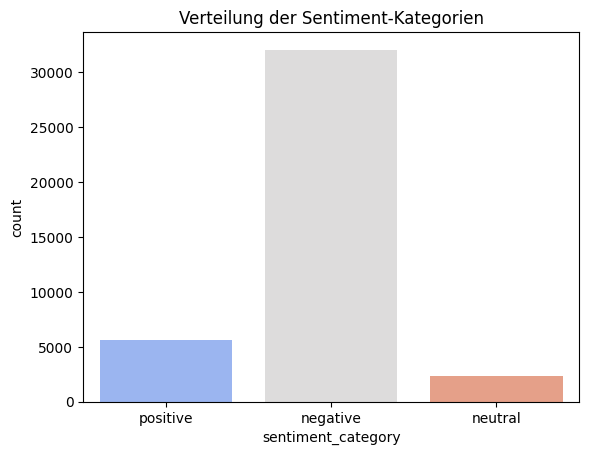

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisierung der Sentiment-Verteilung
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Verteilung der Sentiment-Kategorien')
plt.show()


In [ ]:
average_sentiment_by_username = df.groupby('user')['compound'].mean().sort_values(ascending=False)
print(average_sentiment_by_username.head(10))  # Zeige die Top 10 Akteure mit dem positivsten Sentiment


user
{'_type': 'snscrape.modules.twitter.User', 'username': 'LeonardWrightJ1', 'id': 1334873723506216962, 'displayname': 'Leonard Wright Jr', 'description': 'serial entrepreneur in food tech and hospitality industries worldwide. restaurant franchises, food delivery platforms, celebrity chef management.', 'rawDescription': 'serial entrepreneur in food tech and hospitality industries worldwide. restaurant franchises, food delivery platforms, celebrity chef management.', 'descriptionUrls': None, 'verified': False, 'created': '2020-12-04T14:54:50+00:00', 'followersCount': 55, 'friendsCount': 320, 'statusesCount': 32, 'favouritesCount': 5, 'listedCount': 0, 'mediaCount': 7, 'location': '', 'protected': False, 'linkUrl': 'http://www.ghostkitchenbrands.com', 'linkTcourl': 'https://t.co/JFoMUwKasB', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1334873940158799873/iwAzKsii_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1334873723506216962/1616467006', 'label

In [ ]:
# Beispiel: Akteure kategorisieren (z.B. 'Politiker', 'Medien', 'Influencer')
# df['user_category'] = ...

# Durchschnittliches Sentiment pro Akteurskategorie
average_sentiment_by_category = df.groupby('user')['compound'].mean()
print(average_sentiment_by_category)


user
{'_type': 'snscrape.modules.twitter.User', 'username': '000Kevin_', 'id': 1462614105450287107, 'displayname': 'Ke\\/in', 'description': '', 'rawDescription': '', 'descriptionUrls': None, 'verified': False, 'created': '2021-11-22T02:49:28+00:00', 'followersCount': 4, 'friendsCount': 70, 'statusesCount': 352, 'favouritesCount': 1230, 'listedCount': 1, 'mediaCount': 16, 'location': '', 'protected': False, 'linkUrl': None, 'linkTcourl': None, 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1489826237057015810/KMJNwSbm_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/1462614105450287107/1644037419', 'label': None, 'url': 'https://twitter.com/000Kevin_'}                                                                                                                                                                                                                                                                                                                   

In [ ]:
from scipy.stats import pearsonr

# Berechne die Pearson-Korrelation
correlation, p_value = pearsonr(df['user'], df['compound'])

print(f"Korrelationskoeffizient: {correlation}, p-Wert: {p_value}")


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
average_sentiment_by_user = df.groupby('user')['compound'].mean().reset_index()


In [ ]:
# Benutzer numerisch kodieren
average_sentiment_by_user['user_numeric'] = average_sentiment_by_user['user'].astype('category').cat.codes


In [ ]:
from scipy.stats import pearsonr

# Berechnung des Pearson-Korrelationskoeffizienten
correlation, p_value = pearsonr(average_sentiment_by_user['user_numeric'], average_sentiment_by_user['compound'])

print(f"Pearson-Korrelationskoeffizient: {correlation}")
print(f"P-Wert: {p_value}")


Pearson-Korrelationskoeffizient: 0.0009386685220865052
P-Wert: 0.8639818372865216


In [ ]:
#Aktuere einzeln Untersuchen

In [ ]:
top_akteure = ['ZelenskyyUa', 'YouTube', 'POTUS', 'Ukraine', 'KremlinRussia_E',
               'NATO', 'KyivIndependent', 'mfa_russia', 'Reuters', 'BorisJohnson',
               'MFA_Ukraine', 'FoxNews', 'CNN', 'RF_OSCE', 'nytimes',
               'JoeBiden', 'RusEmbUSA', 'elonmusk', 'nexta_tv', 'RussiaUN']

# Filtere den DataFrame nach den Top-Akteuren
df_top_akteure = df[df['mentions'].isin(top_akteure)]

print(df_top_akteure.head())


Empty DataFrame
Columns: [_type, url, date, content, renderedContent, id, user, replyCount, retweetCount, likeCount, quoteCount, conversationId, lang, source, sourceUrl, sourceLabel, outlinks, tcooutlinks, media, retweetedTweet, quotedTweet, inReplyToTweetId, inReplyToUser, mentionedUsers, coordinates, place, hashtags, cashtags, Searh, mentions, sentiment, neg, neu, pos, compound, sentiment_category]
Index: []

[0 rows x 36 columns]


In [ ]:
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,hashtags,cashtags,Searh,mentions,sentiment,neg,neu,pos,compound,sentiment_category
0,snscrape.modules.twitter.Tweet,https://twitter.com/ksenijapavlovic/status/150...,2022-03-05 23:59:58+00:00,There was an anti war protest for #Ukraine as ...,There was an anti war protest for #Ukraine as ...,1500259859937337349,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,4,25,...,['Ukraine'],NaN,Ukraine war,[],"{'neg': 0.152, 'neu': 0.635, 'pos': 0.213, 'co...",0.152,0.635,0.213,0.6542,positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/ty_phoon31/status/15002598...,2022-03-05 23:59:58+00:00,https://t.co/Z1pURKlNHu NATO followed USA into...,abc.net.au/news/2022-03-0… NATO followed USA i...,1500259857160568834,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine war,[],"{'neg': 0.226, 'neu': 0.716, 'pos': 0.059, 'co...",0.226,0.716,0.059,-0.7717,negative
2,snscrape.modules.twitter.Tweet,https://twitter.com/ann_peace22/status/1500259...,2022-03-05 23:59:54+00:00,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,@mfa_russia @RusEmbUSA @RussiaUN @MFA_Ukraine ...,1500259841520111616,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,['IStandWithUkraine'],NaN,Ukraine war,"[@mfa_russia, @RusEmbUSA, @RussiaUN, @MFA_Ukra...","{'neg': 0.21, 'neu': 0.79, 'pos': 0.0, 'compou...",0.210,0.790,0.000,-0.8707,negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/GardensR4Health/status/150...,2022-03-05 23:59:52+00:00,@nytimes This war could have been avoided by e...,@nytimes This war could have been avoided by e...,1500259833915883525,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine war,[@nytimes],"{'neg': 0.352, 'neu': 0.558, 'pos': 0.09, 'com...",0.352,0.558,0.090,-0.7259,negative
4,snscrape.modules.twitter.Tweet,https://twitter.com/kbrunolieber/status/150025...,2022-03-05 23:59:52+00:00,@ggreenwald Remember the biggest mistake made ...,@ggreenwald Remember the biggest mistake made ...,1500259832649203713,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,2,...,NaN,NaN,Ukraine war,[@ggreenwald],"{'neg': 0.215, 'neu': 0.738, 'pos': 0.047, 'co...",0.215,0.738,0.047,-0.8020,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,snscrape.modules.twitter.Tweet,https://twitter.com/Iyosayi_Je_Tv/status/14977...,2022-02-26 23:10:59+00:00,Ukraine War: Understanding Russian President V...,Ukraine War: Understanding Russian President V...,1497710816526807044,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,1,...,NaN,NaN,Ukraine war,[],"{'neg': 0.438, 'neu': 0.562, 'pos': 0.0, 'comp...",0.438,0.562,0.000,-0.8316,negative
39996,snscrape.modules.twitter.Tweet,https://twitter.com/habib_baba/status/14977108...,2022-02-26 23:10:58+00:00,Q&amp;A’s on: was Russia right to be threatene...,Q&amp;A’s on: was Russia right to be threatene...,1497710811069960196,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine war,[],"{'neg': 0.165, 'neu': 0.723, 'pos': 0.112, 'co...",0.165,0.723,0.112,-0.4404,negative
39997,snscrape.modules.twitter.Tweet,https://twitter.com/GrimDawn4/status/149771081...,2022-02-26 23:10:58+00:00,@NikkiHaley Democrats now want to finance Hunt...,@NikkiHaley Democrats now want to finance Hunt...,1497710810768244736,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,Ukraine war,[@NikkiHaley],"{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'comp...",0.000,0.874,0.126,0.0772,positive
39998,snscrape.modules.twitter.Tweet,https://twitter.com/habib_baba/status/14977108...,2022-02-26 23:10:56+00:00,1/4 As we are gutted and praying for the Peopl...,1/4 As we are gutted and praying for the Peopl...,1497710804266795014,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,NaN,Ukraine war,[],"{'neg': 0.065, 'neu': 0.763, 'pos': 0.172, 'co...",0.065,0.763,0.172,0.5641,positive


In [ ]:
#Netzwerkanalyse #2

In [ ]:
# Beispiel für spezifische Akteure
spezifische_akteure = ['ZelenskyyUa', 'BorisJohnson', 'MFA_Ukraine']  # Ersetze diese durch die tatsächlichen Benutzernamen

# Filtere den DataFrame nach diesen Akteuren
df_spezifische_akteure = df[df['user'].isin(spezifische_akteure)]

print(df_spezifische_akteure.head())  # Überprüfe den gefilterten DataFrame


Empty DataFrame
Columns: [_type, url, date, content, renderedContent, id, user, replyCount, retweetCount, likeCount, quoteCount, conversationId, lang, source, sourceUrl, sourceLabel, outlinks, tcooutlinks, media, retweetedTweet, quotedTweet, inReplyToTweetId, inReplyToUser, mentionedUsers, coordinates, place, hashtags, cashtags, Searh, mentions, sentiment, neg, neu, pos, compound, sentiment_category]
Index: []

[0 rows x 36 columns]


In [ ]:
print(df['user'].unique())


["{'_type': 'snscrape.modules.twitter.user', 'username': 'ksenijapavlovic', 'id': 37529641, 'displayname': 'ksenija pavlovic mcateer', 'description': 'journalism can never be silenced i white house correspondent | publisher of the us independent press thepavlovictoday.com - newspack member | @yale | lse', 'rawdescription': 'journalism can never be silenced i white house correspondent | publisher of the us independent press https://t.co/bvuhptqc4u - newspack member | @yale | lse', 'descriptionurls': [{'text': 'thepavlovictoday.com', 'url': 'http://thepavlovictoday.com', 'tcourl': 'https://t.co/bvuhptqc4u', 'indices': [101, 124]}], 'verified': true, 'created': '2009-05-03t23:17:19+00:00', 'followerscount': 12536, 'friendscount': 1485, 'statusescount': 2502, 'favouritescount': 11917, 'listedcount': 238, 'mediacount': 220, 'location': 'washington, dc', 'protected': false, 'linkurl': 'http://www.thepavlovictoday.com', 'linktcourl': 'https://t.co/pqykkraiml', 'profileimageurl': 'https://pbs.

In [ ]:
df['user'] = df['user'].str.strip()
spezifische_akteure = [akteur.strip() for akteur in spezifische_akteure]
df_spezifische_akteure = df[df['user'].isin(spezifische_akteure)]


In [ ]:
df['user'] = df['user'].str.lower()
spezifische_akteure = [akteur.lower() for akteur in spezifische_akteure]
df_spezifische_akteure = df[df['user'].isin(spezifische_akteure)]


In [ ]:
for akteur in spezifische_akteure:
    if akteur not in df['user'].unique():
        print(f"{akteur} ist nicht im DataFrame vorhanden.")


@zelenskyyua ist nicht im DataFrame vorhanden.
@leonardwrightj1 ist nicht im DataFrame vorhanden.
@brown_channing ist nicht im DataFrame vorhanden.


In [ ]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _type               40000 non-null  object 
 1   url                 40000 non-null  object 
 2   date                40000 non-null  object 
 3   content             40000 non-null  object 
 4   renderedContent     40000 non-null  object 
 5   id                  40000 non-null  int64  
 6   user                40000 non-null  object 
 7   replyCount          40000 non-null  int64  
 8   retweetCount        40000 non-null  int64  
 9   likeCount           40000 non-null  int64  
 10  quoteCount          40000 non-null  int64  
 11  conversationId      40000 non-null  int64  
 12  lang                40000 non-null  object 
 13  source              40000 non-null  object 
 14  sourceUrl           40000 non-null  object 
 15  sourceLabel         40000 non-null  object 
 16  outl

In [ ]:
!pip install twint

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.2/480.2 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.7/288.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.9 MB/s eta 0:00:00
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33912 sha256=30ce5061743073be27ed2587e5470ccc5ff6104d3d256f0582d8e7b5f2311a51
  Stored in directory: /root/.cache/pip/wheels/48/d2/f5/7a71ea8b6788b85fac82abf4ef84dac03562571f695c3b8f77
  Created wheel for cchardet: filename=cchardet-2.1.7-cp310-cp310-linux_x86_64.whl size=289388 sha256=7d881a63d96ae0c90579f8ada6b8bd1984915f4d1e3de4b984938030231a4aba
  Stored in directory: /root/.cache/pip/wheels/ee/e0/

In [ ]:
twint -u ZelenskyyUa

SyntaxError: invalid syntax (<ipython-input-3-dc2605155430>, line 1)